In [10]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict

from dotenv import load_dotenv
load_dotenv()

True

In [11]:
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

In [12]:
## Create State
class LLMState(TypedDict):
    ques: str
    ans: str

In [13]:
def llm_calling(state: LLMState) -> LLMState:
    ques = state['ques']
    state['ans'] = llm.invoke(ques).content
    return state

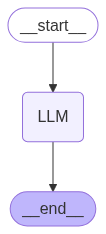

In [14]:
builder = StateGraph(LLMState)

## Define Node
builder.add_node("LLM", llm_calling)

## Define Edge
builder.add_edge(START, "LLM")
builder.add_edge("LLM", END)

## Complie
graph = builder.compile()

## Draw mermaid
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
graph.invoke({'ques': 'Who is the first persident of INDIA?'})

{'ques': 'Who is the first persident of INDIA?',
 'ans': 'The first President of India was **Dr. Rajendra Prasad**.'}